# Importing Libraries

In [253]:
# Supress Warnings

#import warnings
#warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading the data set

In [189]:
df = pd.read_csv("adidas_sales.csv")
df.head()

,retailer,retailer_id,invoice_date,region,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,01-01-2020,Northeast,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,Men's Apparel,60,900,540000,162000.0,0.30,In-store


# Data Inspection

In [190]:
# Display the first 5 rows
df.head()

,retailer,retailer_id,invoice_date,region,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,01-01-2020,Northeast,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,Men's Apparel,60,900,540000,162000.0,0.30,In-store


In [191]:
# Display the last 5 rows
df.tail()

,retailer,retailer_id,invoice_date,region,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
9643,Foot Locker,1185732,24-01-2021,Northeast,Men's Apparel,50,64,3200,896.00,0.28,Outlet
9644,Foot Locker,1185732,24-01-2021,Northeast,Women's Apparel,41,105,4305,1377.60,0.32,Outlet
9645,Foot Locker,1185732,22-02-2021,Northeast,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,22-02-2021,Northeast,Men's Athletic Footwear,42,70,2940,1234.80,0.42,Outlet
9647,Foot Locker,1185732,22-02-2021,Northeast,Women's Street Footwear,29,83,2407,649.89,0.27,Outlet


In [192]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   retailer          9648 non-null   object 
 1   retailer_id       9648 non-null   int64  
 2   invoice_date      9648 non-null   object 
 3   region            9648 non-null   object 
 4   product           9648 non-null   object 
 5   price_per_unit    9648 non-null   int64  
 6   units_sold        9648 non-null   int64  
 7   total_sales       9648 non-null   int64  
 8   operating_profit  9648 non-null   float64
 9   operating_margin  9648 non-null   float64
 10  sales_method      9648 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 829.3+ KB


In [193]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(9648, 11)

In [194]:
# Let's look at some statistical information about the dataframe.
df.describe()

,retailer_id,price_per_unit,units_sold,total_sales,operating_profit,operating_margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


# Data Cleaning

In [195]:
# Check for duplicate rows
df.duplicated().sum()

0

In [196]:
# Check for null values in each column
df.isnull().sum()

retailer            0
retailer_id         0
invoice_date        0
region              0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
operating_margin    0
sales_method        0
dtype: int64

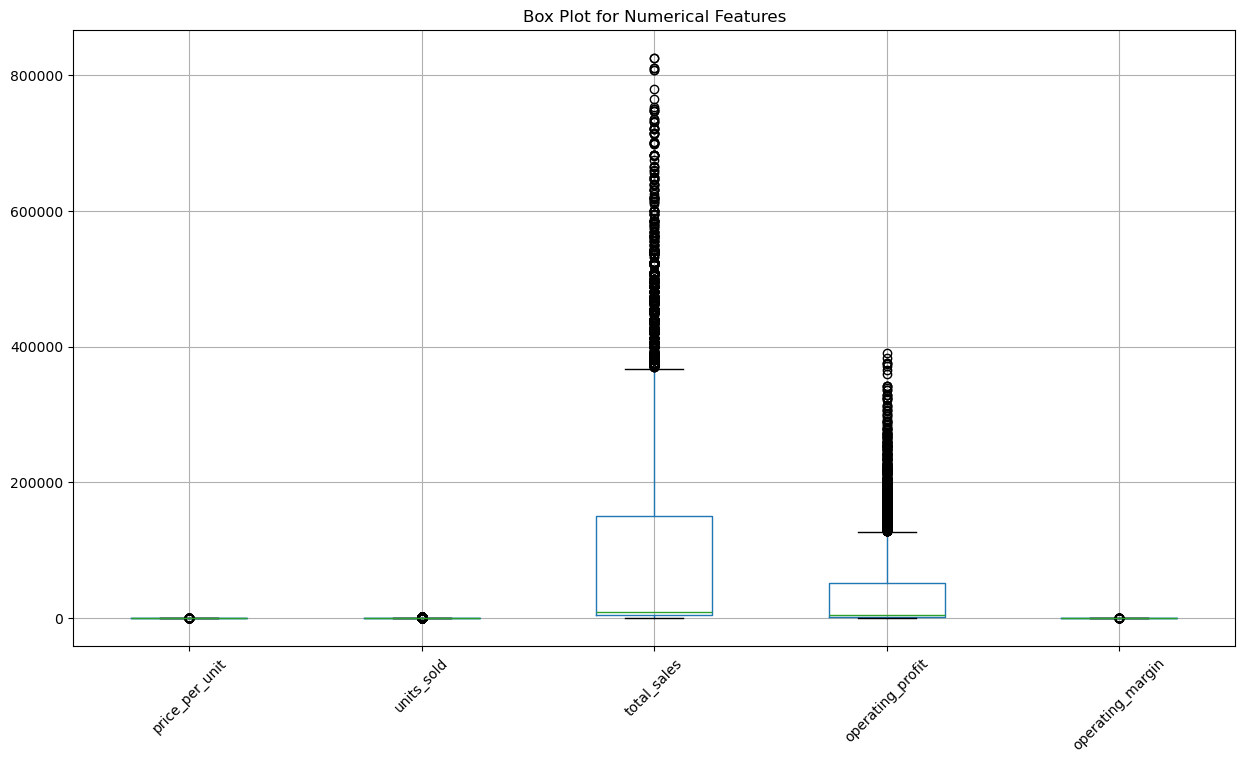

In [197]:
# List of numerical features to analyze for outliers
numeric_features = ['price_per_unit', 'units_sold', 'total_sales', 'operating_profit', 'operating_margin']

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a box plot for each numerical feature
df[numeric_features].boxplot()

# Set the title
plt.title('Box Plot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

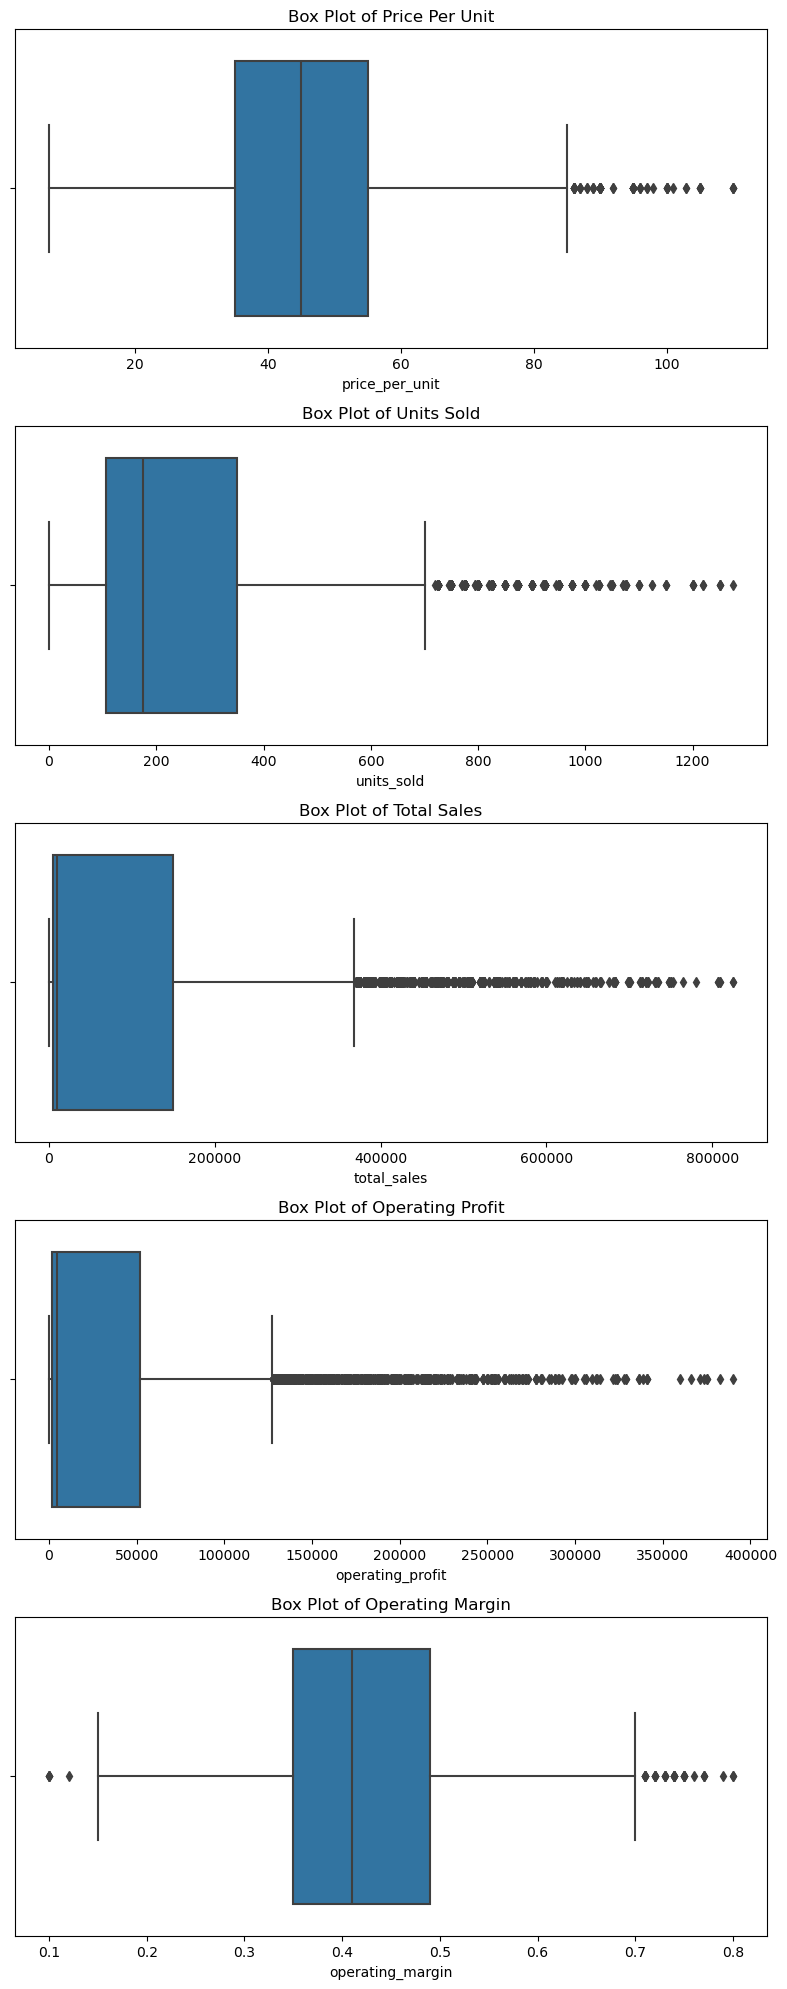

In [198]:
# Set up the matplotlib figure with subplots
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))

# Create box plots for each numerical feature
sns.boxplot(x=df['price_per_unit'], ax=axs[0])
axs[0].set_title('Box Plot of Price Per Unit')

sns.boxplot(x=df['units_sold'], ax=axs[1])
axs[1].set_title('Box Plot of Units Sold')

sns.boxplot(x=df['total_sales'], ax=axs[2])
axs[2].set_title('Box Plot of Total Sales')

sns.boxplot(x=df['operating_profit'], ax=axs[3])
axs[3].set_title('Box Plot of Operating Profit')

sns.boxplot(x=df['operating_margin'], ax=axs[4])
axs[4].set_title('Box Plot of Operating Margin')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [199]:
df['operating_margin']

0       0.50
1       0.30
2       0.35
3       0.35
4       0.30
        ... 
9643    0.28
9644    0.32
9645    0.37
9646    0.42
9647    0.27
Name: operating_margin, Length: 9648, dtype: float64

In [200]:
# Remove outliers (replace with your own outlier removal code if necessary)
def remove_outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [201]:
columns = ['price_per_unit', 'units_sold', 'total_sales', 'operating_profit', 'operating_margin']

In [202]:
for col in columns:
    lr, ur = remove_outlier(df[col])
    df[col] = np.where(df[col] > ur, ur, df[col])
    df[col] = np.where(df[col] < lr, lr, df[col])


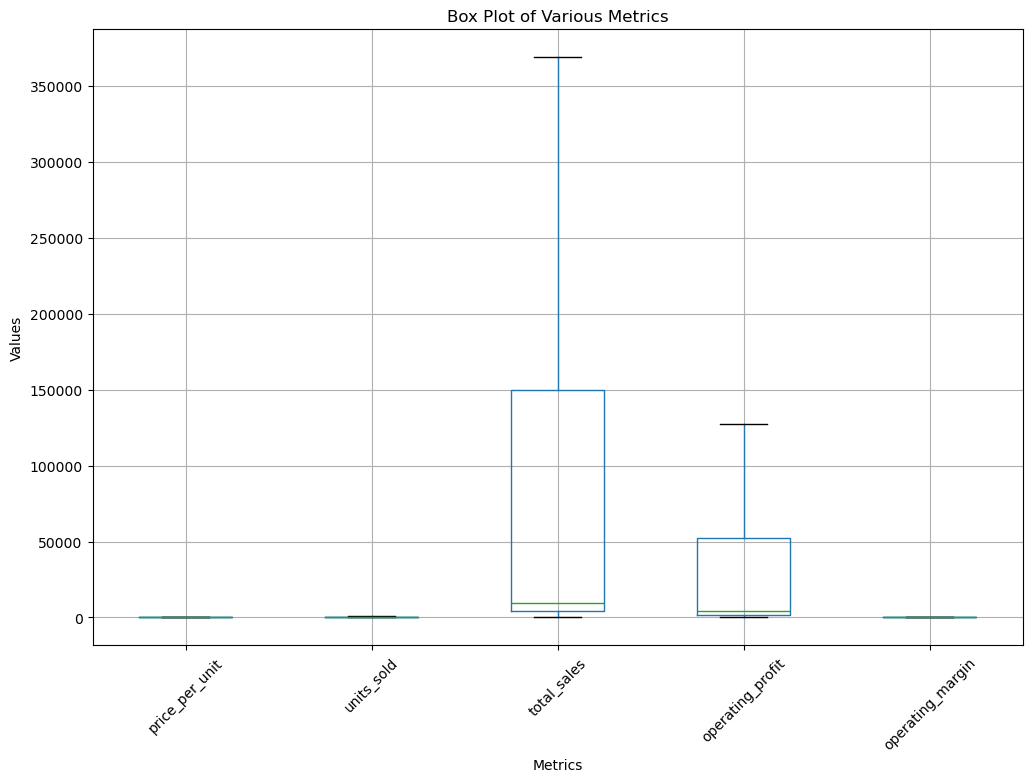

In [203]:
# Plotting the box plots
plt.figure(figsize=(12, 8))
df[columns].boxplot()
plt.title('Box Plot of Various Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [205]:
# Remove the 'retailer_id' and 'invoice_date' columns
df = df.drop(columns=['retailer_id', 'invoice_date'])

# Encoding

In [206]:
y = df['total_sales']
x = df.drop('total_sales',axis=1)

In [207]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le = LabelEncoder()

In [208]:
x_var = x.select_dtypes(include='object')
x_var.head()

,retailer,region,product,sales_method
0,Foot Locker,Northeast,Men's Street Footwear,In-store
1,Foot Locker,Northeast,Men's Athletic Footwear,In-store
2,Foot Locker,Northeast,Women's Street Footwear,In-store
3,Foot Locker,Northeast,Women's Athletic Footwear,In-store
4,Foot Locker,Northeast,Men's Apparel,In-store


In [209]:
for i in x_var.columns:
    print("The no.of unique values in",i,"are: ",x_var.loc[:,i].nunique())

The no.of unique values in retailer are:  6
The no.of unique values in region are:  5
The no.of unique values in product are:  6
The no.of unique values in sales_method are:  3


In [210]:
for i in x_var.columns:
    
    x_var[i] = le.fit_transform(x_var[i])
x_var.tail()

,retailer,region,product,sales_method
9643,1,1,0,2
9644,1,1,3,2
9645,1,1,2,2
9646,1,1,1,2
9647,1,1,5,2


In [211]:
x_num = x.select_dtypes(include=np.number)
x_num.head()

,price_per_unit,units_sold,operating_profit,operating_margin
0,50.0,716.0,127273.62125,0.50
1,50.0,716.0,127273.62125,0.30
2,40.0,716.0,127273.62125,0.35
3,45.0,716.0,127273.62125,0.35
4,60.0,716.0,127273.62125,0.30


In [217]:
ss = StandardScaler()

In [218]:
x_num = pd.DataFrame(ss.fit_transform(x_num),columns=x_num.columns)
x_num.head()

,price_per_unit,units_sold,operating_profit,operating_margin
0,0.335447,2.389591,2.32509,0.798298
1,0.335447,2.389591,2.32509,-1.271236
2,-0.355411,2.389591,2.32509,-0.753853
3,-0.009982,2.389591,2.32509,-0.753853
4,1.026305,2.389591,2.32509,-1.271236


In [219]:
df = pd.concat([x_var,x_num],axis=1)
df.head()

,retailer,region,product,sales_method,price_per_unit,units_sold,operating_profit,operating_margin
0,1,1,2,0,0.335447,2.389591,2.32509,0.798298
1,1,1,1,0,0.335447,2.389591,2.32509,-1.271236
2,1,1,5,0,-0.355411,2.389591,2.32509,-0.753853
3,1,1,4,0,-0.009982,2.389591,2.32509,-0.753853
4,1,1,0,0,1.026305,2.389591,2.32509,-1.271236


# Exploratory Data Analysis¶

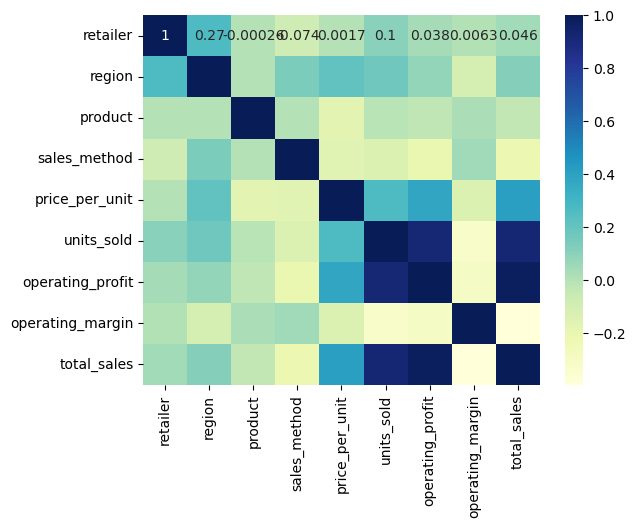

In [250]:
# Let's see the correlation between different variables.
cor = pd.concat([x_var,x_num,y],axis=1)
sns.heatmap(cor.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [221]:
print("All Columns:", df.columns)

All Columns: Index(['retailer', 'region', 'product', 'sales_method', 'price_per_unit',
       'units_sold', 'operating_profit', 'operating_margin'],
      dtype='object')


In [222]:
x = df
x.head()

,retailer,region,product,sales_method,price_per_unit,units_sold,operating_profit,operating_margin
0,1,1,2,0,0.335447,2.389591,2.32509,0.798298
1,1,1,1,0,0.335447,2.389591,2.32509,-1.271236
2,1,1,5,0,-0.355411,2.389591,2.32509,-0.753853
3,1,1,4,0,-0.009982,2.389591,2.32509,-0.753853
4,1,1,0,0,1.026305,2.389591,2.32509,-1.271236


In [223]:
y.head()

0    368618.25
1    368618.25
2    368618.25
3    368618.25
4    368618.25
Name: total_sales, dtype: float64

# Splitting Data into Training and Testing Sets

In [225]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [227]:
print("The shape of xtrain is: ",X_train.shape)
print("The shape of xtest is: ",X_test.shape)
print("The shape of ytrain is: ",y_train.shape)
print("The shape of ytest is: ",y_test.shape)

The shape of xtrain is:  (6753, 8)
The shape of xtest is:  (2895, 8)
The shape of ytrain is:  (6753,)
The shape of ytest is:  (2895,)


# Performing Linear Regression

In [228]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

# Coefficients Calculation

In [229]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

86847.61761575496
[-4.97562653e+01  2.73215064e+02  4.19045228e+02 -2.49802190e+03
  5.94508584e+03  1.67018573e+04  9.59450855e+04 -1.16064344e+04]


# Predictions

In [230]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

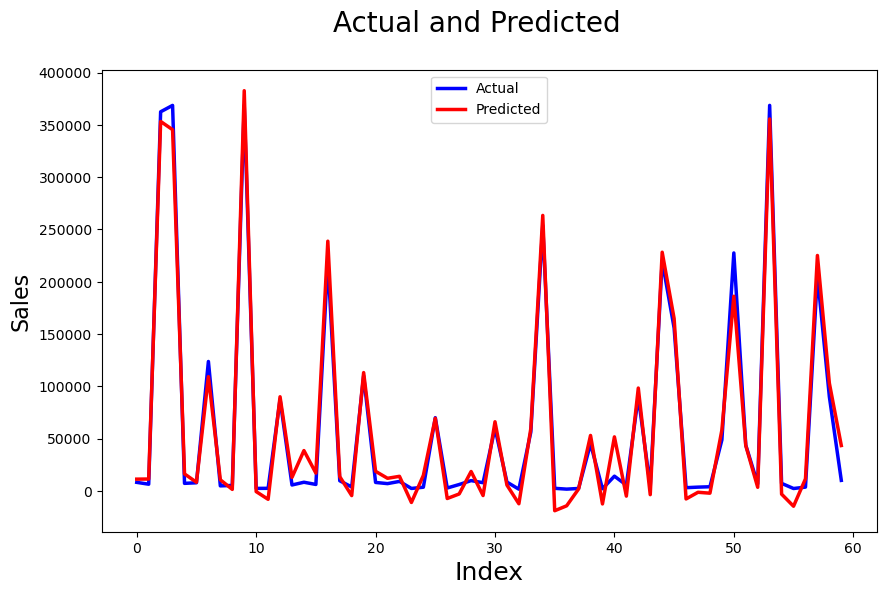

In [245]:
# Generate index for the length of y_test and y_pred
c = [i for i in range(len(y_test))]  # assuming y_test and y_pred are of the same length (9647)

fig = plt.figure(figsize=(10, 6))  # Optionally, you can adjust the figure size
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('Sales', fontsize=16)  # Y-label
plt.legend()
plt.show()

In [246]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [247]:
r_squared = r2_score(y_test, y_pred)

In [248]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 185299743.3811641
r_square_value : 0.9828879203026253


Text(0, 0.5, 'Predicted Y')

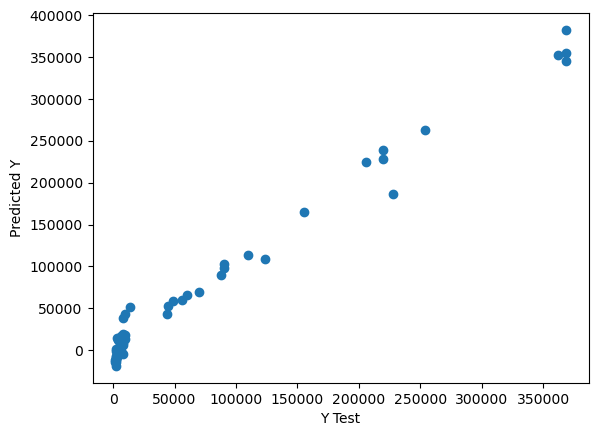

In [249]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')